In [ ]:
!pip install yfinance pandas

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import yfinance as yf
import pandas as pd

# Define stock tickers to fetch data for
stock_symbols = ["AAPL", "MSFT", "GOOGL", "TSLA", "AMZN", "NVDA", "META", "NFLX", "AMD", "BA"]

# Define time range
start_date = "2020-01-01"
end_date = "2025-1-31"

# Fetch historical data
stock_data = {}
for symbol in stock_symbols:
    stock = yf.Ticker(symbol)
    df = stock.history(period="5y", start=start_date, end=end_date, interval="1d")
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df["Ticker"] = symbol
    stock_data[symbol] = df

# Combine all stocks into one DataFrame
stock_df = pd.concat(stock_data.values(), ignore_index=False)
stock_df.reset_index(inplace=True)

# Save dataset
stock_df.to_csv("stock_market_data.csv", index=False)
print("Stock dataset saved successfully!")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Stock dataset saved successfully!


In [ ]:
stock_df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Open,High,Low,Close,Volume,Ticker
0,2020-01-02 00:00:00-05:00,71.721011,72.776591,71.466805,72.716064,135480400,AAPL
1,2020-01-03 00:00:00-05:00,71.941321,72.771737,71.783954,72.009109,146322800,AAPL
2,2020-01-06 00:00:00-05:00,71.127851,72.621631,70.876060,72.582893,118387200,AAPL
3,2020-01-07 00:00:00-05:00,72.592571,72.849201,72.021208,72.241524,108872000,AAPL
4,2020-01-08 00:00:00-05:00,71.943751,73.706271,71.943751,73.403641,132079200,AAPL


In [ ]:
import yfinance as yf
import pandas as pd

# Define stock tickers to fetch data for
stock_symbols = ["AAPL", "MSFT", "GOOGL", "TSLA", "AMZN", "NVDA", "META", "NFLX", "AMD", "BA"]

# Define time range
start_date = "2020-01-01"
end_date = "2025-1-31"

# Fetch historical data
stock_data = {}
for symbol in stock_symbols:
    stock = yf.Ticker(symbol)
    df = stock.history(period="5y", start=start_date, end=end_date, interval="1d")
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df["Ticker"] = symbol
    stock_data[symbol] = df

# Combine all stocks into one DataFrame
stock_df = pd.concat(stock_data.values(), ignore_index=False)
stock_df.reset_index(inplace=True)

# Calculate daily percentage change
stock_df['Daily_Change'] = stock_df.groupby('Ticker')['Close'].pct_change()

# Save dataset
stock_df.to_csv("stock_market_data.csv", index=False)
print("Stock dataset saved successfully!")

stock_df.head()
summary_df = stock_df.describe()
summary_df

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Stock dataset saved successfully!


,Open,High,Low,Close,Volume,Daily_Change
count,12770.000000,12770.000000,12770.000000,12770.000000,1.277000e+04,12760.000000
mean,204.962969,207.931198,201.950582,204.987024,8.944684e+07,0.001391
std,144.498645,146.227208,142.690711,144.493091,1.415215e+08,0.028951
min,4.984595,5.229715,4.500833,4.892426,1.144000e+06,-0.351166
25%,114.588464,116.556727,112.730003,114.270868,1.872388e+07,-0.012136
50%,170.933787,173.159996,168.685083,171.043503,4.078850e+07,0.001055
75%,252.078597,255.397495,248.304913,251.998333,8.537245e+07,0.014711
max,998.030029,999.000000,970.010010,984.859985,1.543911e+09,0.243696


In [ ]:
# Print the first few rows of AAPL data
print(stock_df[stock_df['Ticker'] == 'AAPL'].head())

                       Date       Open       High        Low      Close  \
0 2020-01-02 00:00:00-05:00  71.721011  72.776591  71.466805  72.716064   
1 2020-01-03 00:00:00-05:00  71.941321  72.771737  71.783954  72.009109   
2 2020-01-06 00:00:00-05:00  71.127851  72.621631  70.876060  72.582893   
3 2020-01-07 00:00:00-05:00  72.592571  72.849201  72.021208  72.241524   
4 2020-01-08 00:00:00-05:00  71.943751  73.706271  71.943751  73.403641   

      Volume Ticker  Daily_Change  
0  135480400   AAPL           NaN  
1  146322800   AAPL     -0.009722  
2  118387200   AAPL      0.007968  
3  108872000   AAPL     -0.004703  
4  132079200   AAPL      0.016087  


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Find the index of the first row for AAPL
first_aapl_index = stock_df[(stock_df['Ticker'] == 'AAPL')].index[0]

# Calculate the mean of 'Daily_Change' for AAPL
mean_daily_change_aapl = stock_df[stock_df['Ticker'] == 'AAPL']['Daily_Change'].mean()

# Replace the 'Daily_Change' value for the first AAPL row with the mean of AAPL Daily_Change
stock_df.loc[first_aapl_index, 'Daily_Change'] = mean_daily_change_aapl

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert 'Date' column to datetime format while properly handling timezone information
stock_df['Date'] = pd.to_datetime(stock_df['Date'], utc=True).dt.tz_convert(None)

# Keep only the date part
stock_df['Date'] = stock_df['Date'].dt.date

# Verify the conversion
stock_df.dtypes

# Print the first few rows of AAPL data
print(stock_df[stock_df['Ticker'] == 'AAPL'].head())

         Date       Open       High        Low      Close     Volume Ticker  \
0  2020-01-02  71.721011  72.776591  71.466805  72.716064  135480400   AAPL   
1  2020-01-03  71.941321  72.771737  71.783954  72.009109  146322800   AAPL   
2  2020-01-06  71.127851  72.621631  70.876060  72.582893  118387200   AAPL   
3  2020-01-07  72.592571  72.849201  72.021208  72.241524  108872000   AAPL   
4  2020-01-08  71.943751  73.706271  71.943751  73.403641  132079200   AAPL   

   Daily_Change  
0      0.001126  
1     -0.009722  
2      0.007968  
3     -0.004703  
4      0.016087  


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stock_df.to_csv("stock_market_data.csv", index=False)
print("Stock dataset saved successfully!")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Stock dataset saved successfully!


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


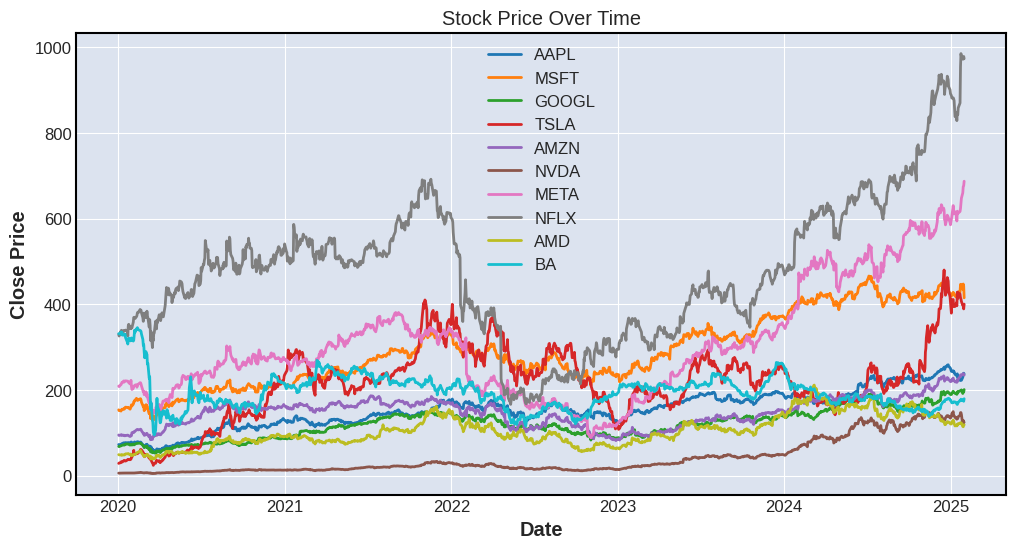

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Line Chart: Stock Price Over Time
plt.figure(figsize=(12, 6))
for ticker in stock_df['Ticker'].unique():
    stock_data = stock_df[stock_df['Ticker'] == ticker]
    plt.plot(stock_data['Date'], stock_data['Close'], label=ticker)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-135-a95262a92fba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])
<ipython-input-135-a95262a92fba>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aapl_data_monthly = aapl_data.resample('M').agg({


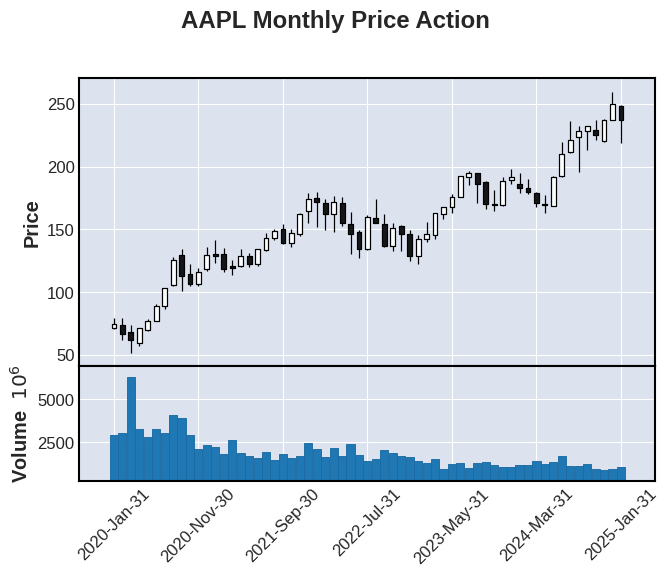

In [ ]:
# 2. Candlestick Chart: Monthly Price Action (for AAPL)
import mplfinance as mpf
aapl_data = stock_df[stock_df['Ticker'] == 'AAPL']

# Convert 'Date' column to DatetimeIndex
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])
aapl_data = aapl_data.set_index('Date')

# Resample to monthly frequency using OHLC method
aapl_data_monthly = aapl_data.resample('M').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

# Plot the monthly candlestick chart
mpf.plot(aapl_data_monthly, type='candle', title='AAPL Monthly Price Action', volume=True)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


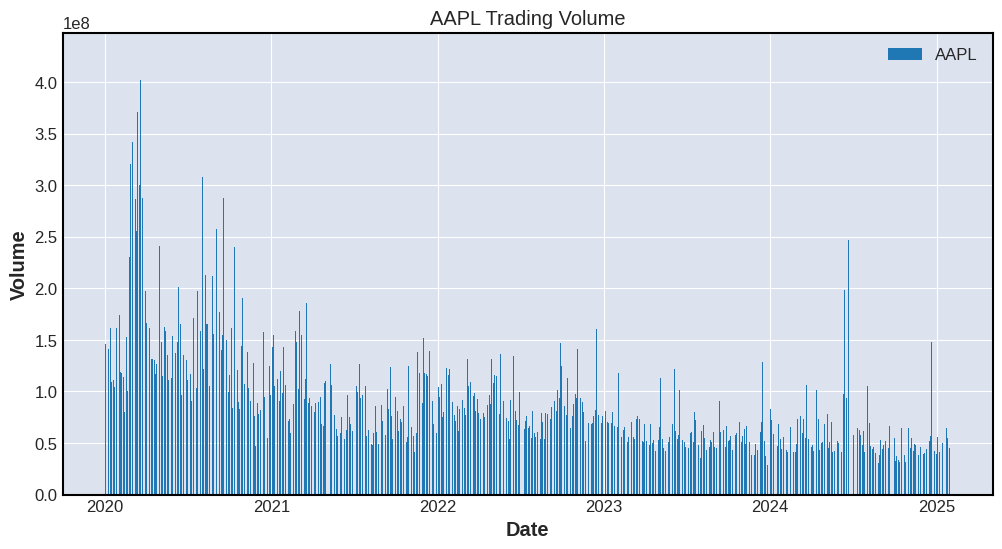

In [ ]:
# 3. Volume Bar Chart (for AAPL)
plt.figure(figsize=(12, 6))
plt.bar(aapl_data.index, aapl_data['Volume'], label='AAPL')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('AAPL Trading Volume')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


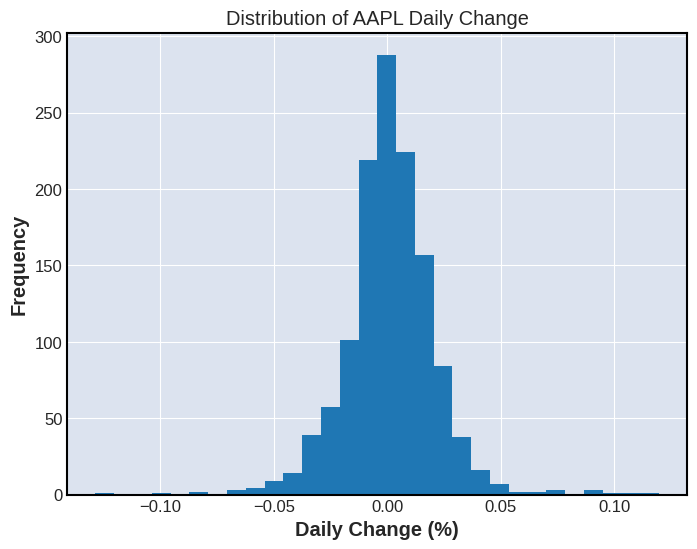

In [ ]:
# 4. Daily Change Histogram (for AAPL)
plt.figure(figsize=(8, 6))
plt.hist(aapl_data['Daily_Change'].dropna(), bins=30)
plt.xlabel('Daily Change (%)')
plt.ylabel('Frequency')
plt.title('Distribution of AAPL Daily Change')
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


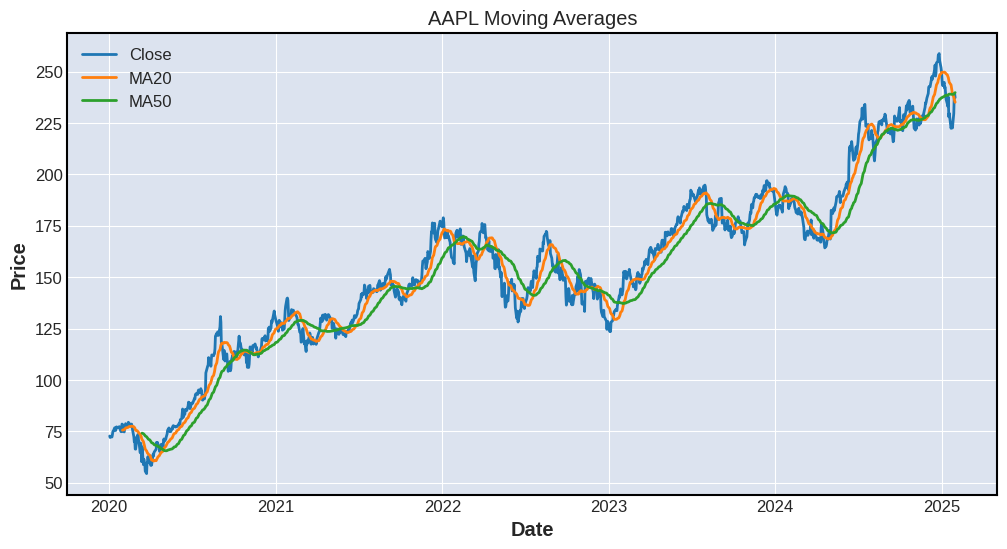

In [ ]:
# 5. Moving Average Chart (for AAPL)
aapl_data['MA20'] = aapl_data['Close'].rolling(window=20).mean()
aapl_data['MA50'] = aapl_data['Close'].rolling(window=50).mean()
plt.figure(figsize=(12, 6))
plt.plot(aapl_data['Close'], label='Close')
plt.plot(aapl_data['MA20'], label='MA20')
plt.plot(aapl_data['MA50'], label='MA50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Moving Averages')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


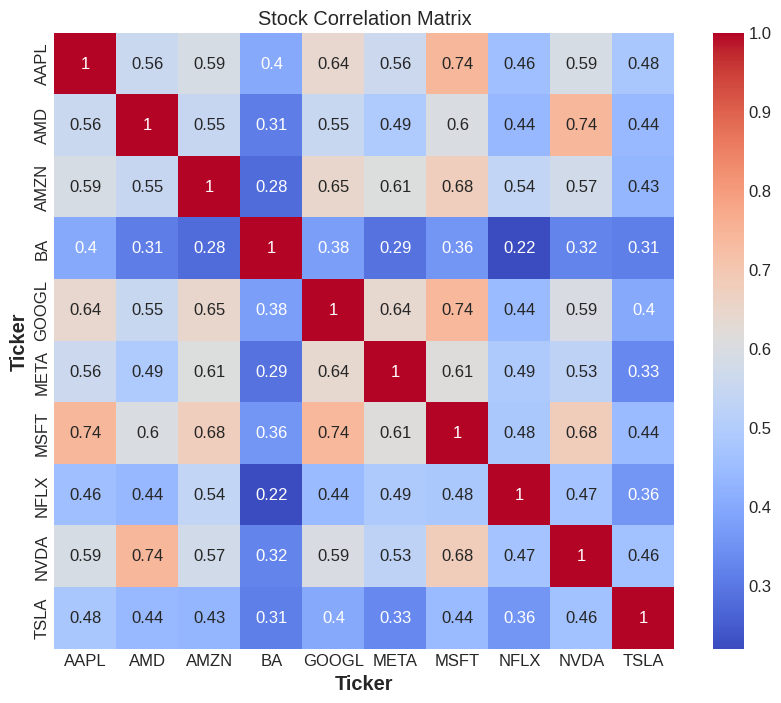

In [ ]:

# 6. Correlation Matrix
daily_returns = stock_df.pivot(index='Date', columns='Ticker', values='Daily_Change').dropna()
correlation_matrix = daily_returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Stock Correlation Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


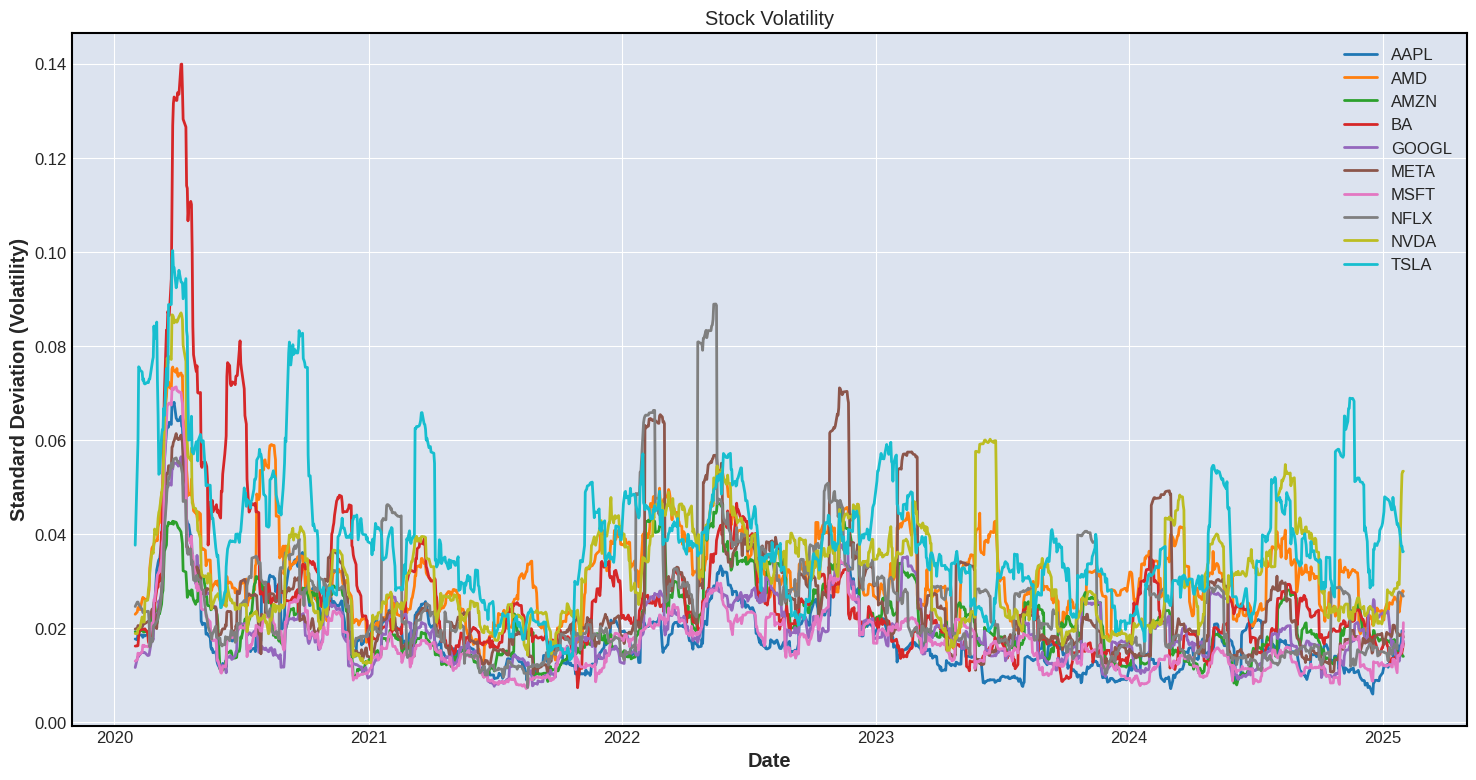

In [ ]:
# 7. Volatility Chart (using Standard Deviation) - Larger Size
volatility = daily_returns.rolling(window=20).std()
plt.figure(figsize=(18, 9))  # Increased figure size
for ticker in volatility.columns:
    plt.plot(volatility.index, volatility[ticker], label=ticker)
plt.xlabel('Date')
plt.ylabel('Standard Deviation (Volatility)')
plt.title('Stock Volatility')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


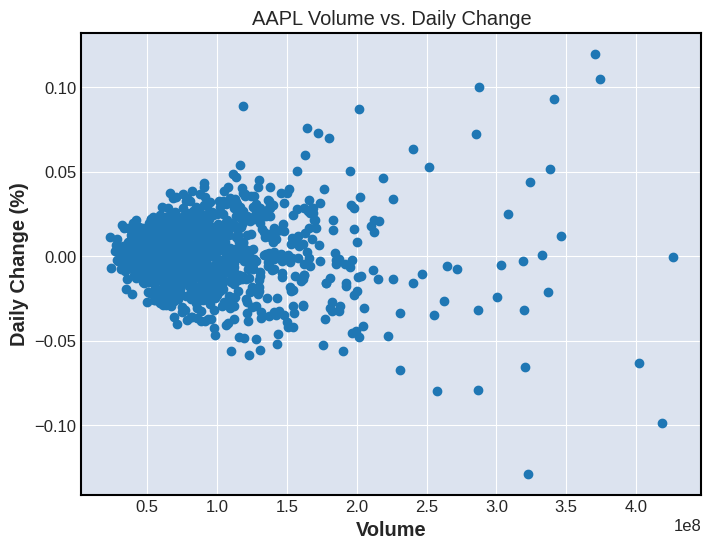

In [ ]:
# 9. Scatter Plot: Volume vs. Daily Change (for AAPL)
plt.figure(figsize=(8, 6))
plt.scatter(aapl_data['Volume'], aapl_data['Daily_Change'])
plt.xlabel('Volume')
plt.ylabel('Daily Change (%)')
plt.title('AAPL Volume vs. Daily Change')
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


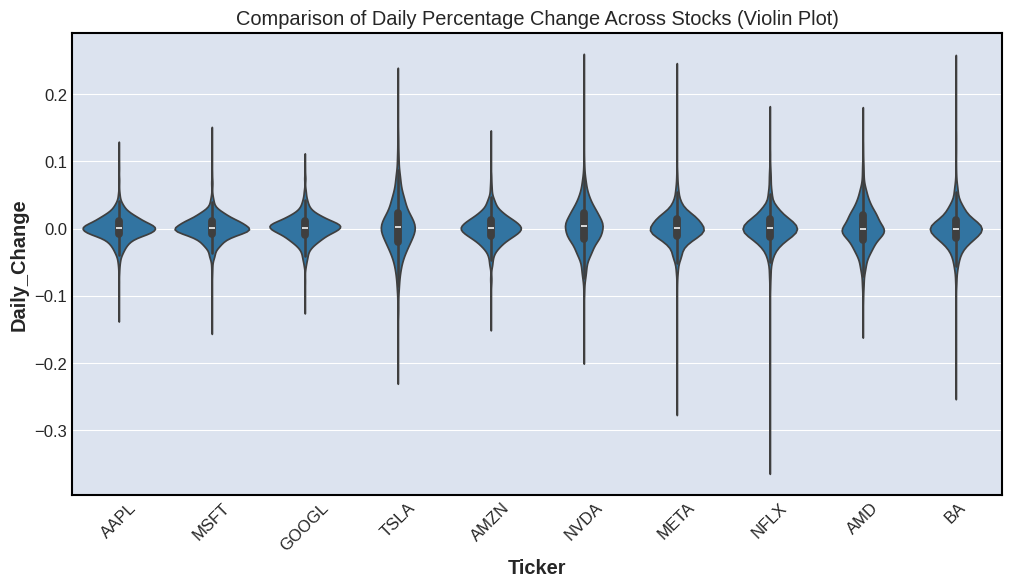

In [ ]:
#10 Violin Plot: Comparing Daily Percentage Change Across Stocks

plt.figure(figsize=(12, 6))
sns.violinplot(x='Ticker', y='Daily_Change', data=stock_df)
plt.title('Comparison of Daily Percentage Change Across Stocks (Violin Plot)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


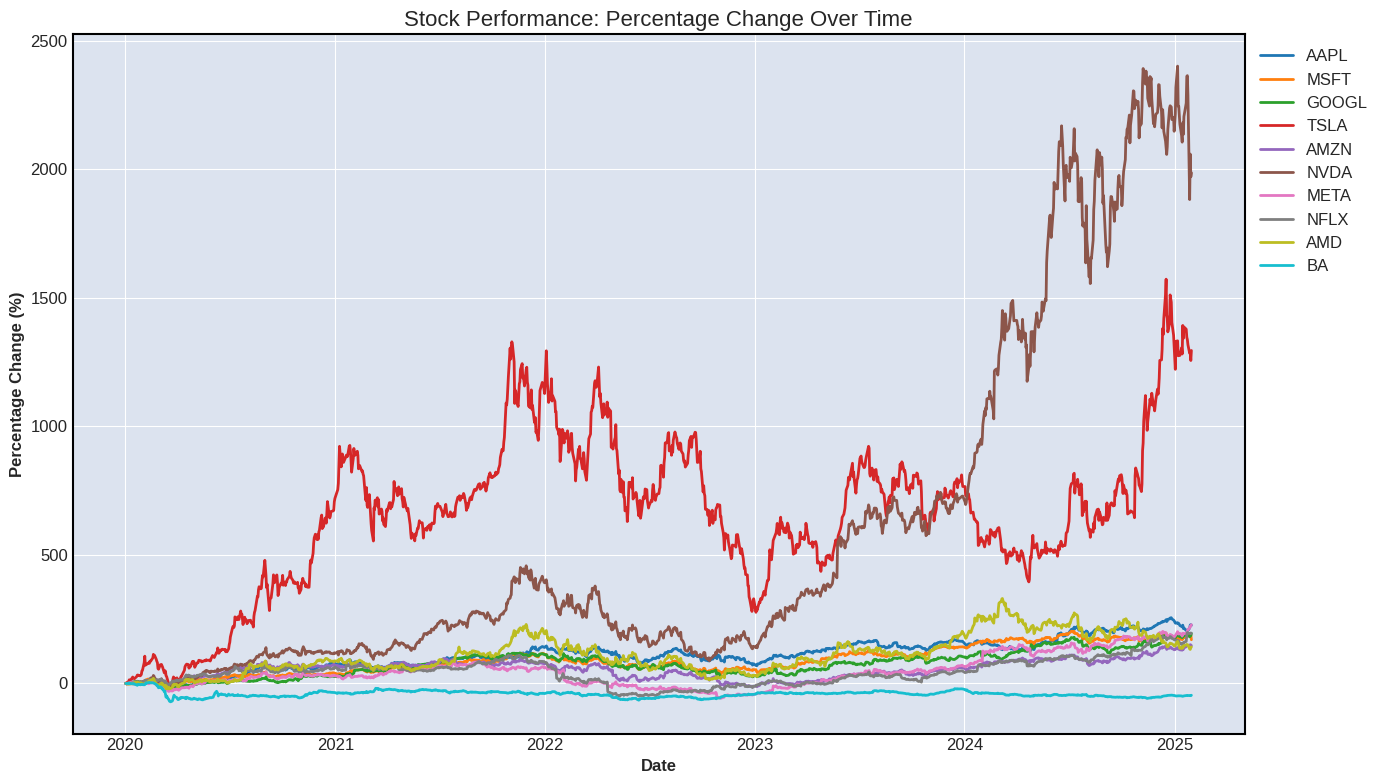

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage change from the first day for each stock
# 10. Transform the groupby result to have a matching index
stock_df['Pct_Change'] = stock_df.groupby('Ticker')['Close'].transform(lambda x: (x / x.iloc[0] - 1) * 100)

# Create the line chart
plt.figure(figsize=(14, 8))  # Adjust figure size as needed
sns.lineplot(x='Date', y='Pct_Change', hue='Ticker', data=stock_df)

# Customize the chart
plt.title('Stock Performance: Percentage Change Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.grid(True)  # Add a grid for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot area
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()